# 1 EDA(탐색적 데이터 분석)

본격적인 데이터 분석 이전에 탐색적 데이터 분석(EDA)를 실행해야 한다.

수집한 데이터를 다양한 관점에서 관찰 및 이해 해야 하며, 주로 그래프를 통해 통계적인 방법으로 직관적 분석을 실행한다.

문제 정의 단계에서 연구 질문과 가설을 바탕으로 계획을 세워야 한다.(어떤 속성 위주의 분석을 할 것인지, 최적의 방법은 무엇인지)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
train = pd.read_csv("train.csv")

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


train.head()를 통해 상위 5줄의 데이터를 호출한다.
train.tail()은 하위 5줄을 호출한다.

In [6]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


요약적인 정보들을 출력할 때 사용한다.

요약된 정보를 통해서 제일 먼저 변수들을 정의 해야 한다.

passengerid - 승객 번호(넘버)

survived - 생존여부 : 생존시 1, 사망시 0

pclass - 탑승 좌석 : 1등석, 2등석, 3등석

name - 승객 이름

sex - 성별 : 남 male, 여 female

Age - 나이

parch - 동승한 부보 또는 자녀의 수(가족수)

ticket - 티켓 번호

fare - 티켓의 요금

cabin - 선실 번호

enbarked - 탑승한 항구

### 1-1. survived column

In [8]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

사망자가 생존자에 비해 많이 있는 것을 확인 할 수 있다.

In [9]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Counts')

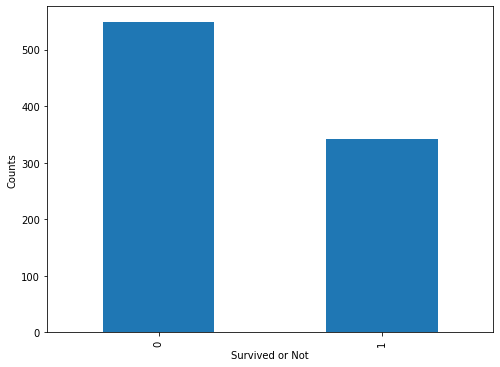

In [10]:
f, ax = plt.subplots(figsize=(8,6))
train['Survived'].value_counts().plot(kind='bar')
plt.xlabel('Survived or Not')
plt.ylabel('Counts')

### 1-2 pclass - Survived

Text(0, 0.5, 'Counts')

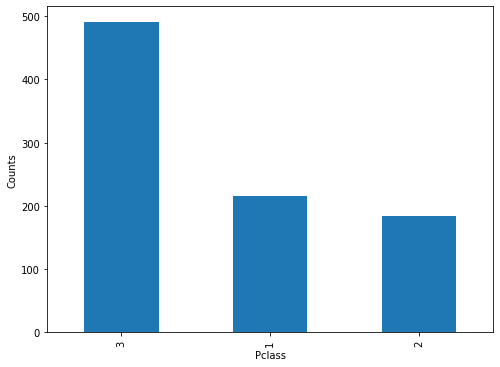

In [11]:
f, ax = plt.subplots(figsize=(8,6))
train['Pclass'].value_counts().plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Counts')

In [12]:
train[['Pclass','Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
train[['Pclass','Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


위는 클래스별 승객수이며, 아래는 생존자 수 이다. 생존일때 survived값이 1이므로 sum을 통해 생존자 수를 구할 수 있다.

클래스 별로 생존비율을 확인해 보자

Text(0, 0.5, 'Probability')

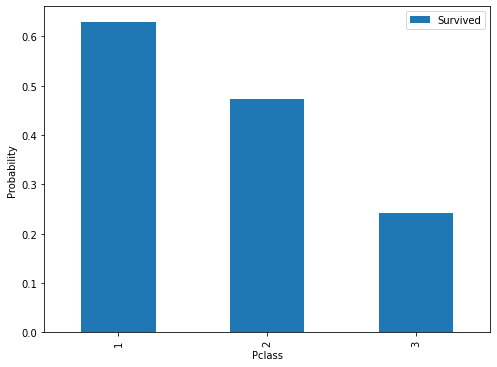

In [14]:
plt.rcParams["figure.figsize"] = (8,6)
train[['Pclass','Survived']].groupby('Pclass').mean().plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Probability')

이번 예시에서 데이터를 통해 얻어야 하는 인사이트는 어떤 파라미터들이 생존여부와 가장 주요한 연관관계를 가지고 있는지 이다. pclass의 각 계층과 생존여부 사이에 관계를 보면, pclass가 생존과 꽤 연관이 있다는 것을 확인할 수 있다.

상위 좌석일시의 생존률이 그렇지 않을때 보다 유의미 하게 높다는 것을 알 수 있다.

### 1-3 sex - Survived

Text(0, 0.5, 'Count')

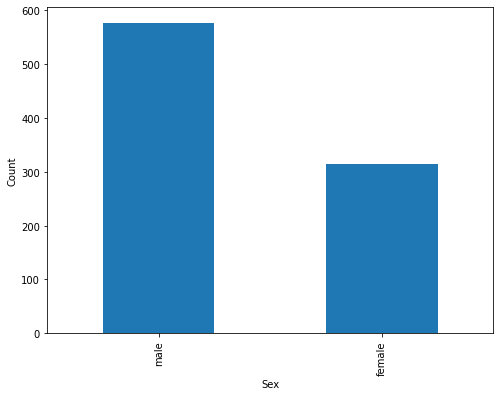

In [15]:
train['Sex'].value_counts().plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Count')

성별을 count해본 결과 남성이 약 600, 여성이 300명으로 2배정도 존재한다.

성별에 따른 생존률을 확인해보면

Text(0, 0.5, 'Probability')

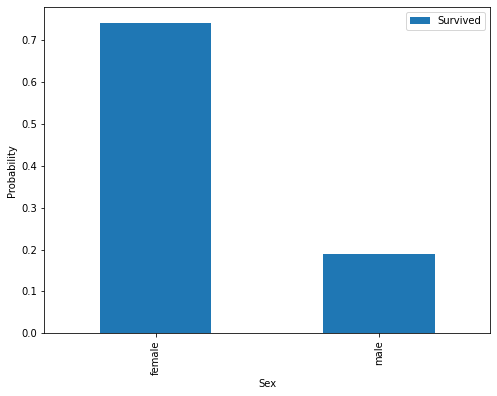

In [16]:
train[['Sex','Survived']].groupby('Sex').mean().plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Probability')

성별에 따른 생존률을 분석해 본 결과, 남성은 20퍼센트대, 여성은 70퍼센트대로 성별에 따른 생존률이 극명해 보인다.

### 1-4 Embarked - Survived

Text(0, 0.5, 'Count')

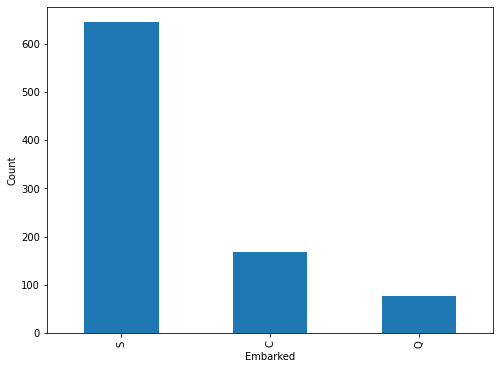

In [17]:
train['Embarked'].value_counts().plot(kind='bar')
plt.xlabel('Embarked')
plt.ylabel('Count')

탑승위치는 S가 600가량으로 가장 많고, C가 200, Q가 100정도로 나타난다.

Text(0, 0.5, 'Probability')

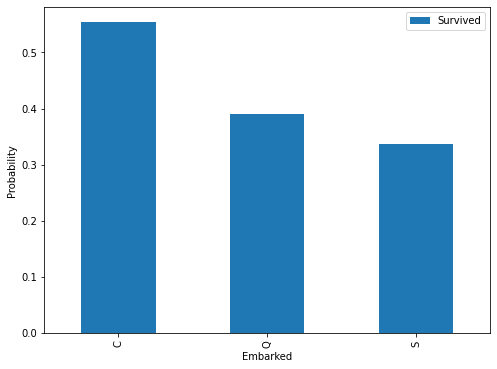

In [18]:
train[['Embarked','Survived']].groupby('Embarked').mean().plot(kind='bar')
plt.xlabel('Embarked')
plt.ylabel('Probability')

탑승 위치별 생존률이 다르게 나타나지만, 정말 유의미한지는 알 수 없어 보인다.

### 1-5 SibSp - Survived

Text(0, 0.5, 'Count')

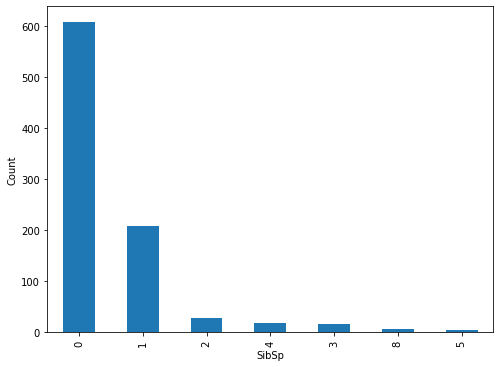

In [19]:
train['SibSp'].value_counts().plot(kind='bar')
plt.xlabel('SibSp')
plt.ylabel('Count')

Text(0, 0.5, 'Probability')

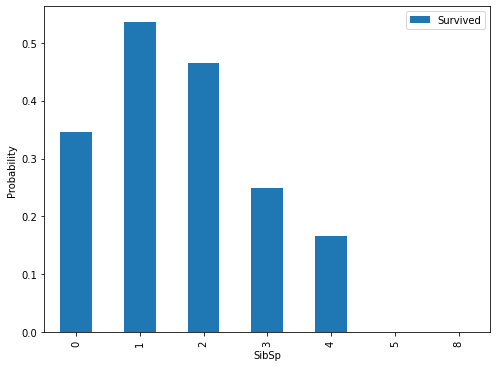

In [20]:
train[['SibSp','Survived']].groupby('SibSp').mean().plot(kind='bar')
plt.xlabel('SibSp')
plt.ylabel('Probability')

동승자의 수가 0명인 경우가 가장 많았고 그 다음으로 1,2,4 명의 순으로 따랐다.

생존률은 1,2명인 경우가 0명인 경우보다 높게 나왔다.
<br> 하지만 마찬가지로 생존 여부와 연관이 있는 유미의한 지표인지는 확인해 봐야 할 것 같다.

### 1-6 Parch - Survived

Text(0, 0.5, 'Count')

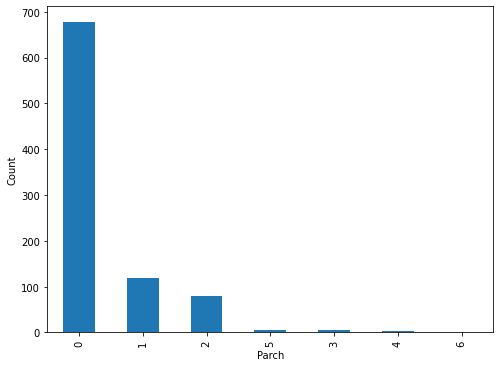

In [21]:
train['Parch'].value_counts().plot(kind='bar')
plt.xlabel('Parch')
plt.ylabel('Count')

Text(0, 0.5, 'Probability')

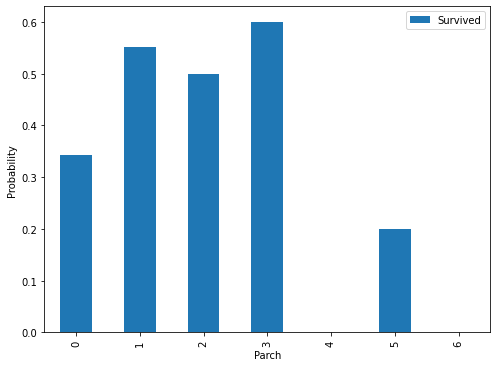

In [22]:
train[['Parch','Survived']].groupby('Parch').mean().plot(kind='bar')
plt.xlabel('Parch')
plt.ylabel('Probability')

대분의 승객은 동승한 자녀/부모가 없었으며 1,2명 동반한 승객이 100여명씩 존재하는것으로 확인됐다.
<br> 또한 동승한 자녀/부모의 수가 생존여부에 대해 유의미한 지표인지 또한 확인할 수 없다.

# 2 Preprocessing (데이터 전처리)

### 2-1 다중 공선성 확인
변수간의 다중 공선성을 확인한 뒤, 불필요한 특성을 제거한다.

In [23]:
total = train.isnull().sum().sort_values(ascending = False)

In [24]:
total

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

결측치는 cabin에 687개, age에 177개, enbarked에 2개가 존재하는 것을 확인할 수 있다. 각 컬럼별로 891개의 데이터가 존재한다.

In [25]:
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)

##### Embarked column과 Pclass column 

두 컬럼간의 다중 공선성을 확인하기 위해서 embarked 별로 pclass당 수를 카운트 하여 보았다.

<Axes: xlabel='Embarked', ylabel='count'>

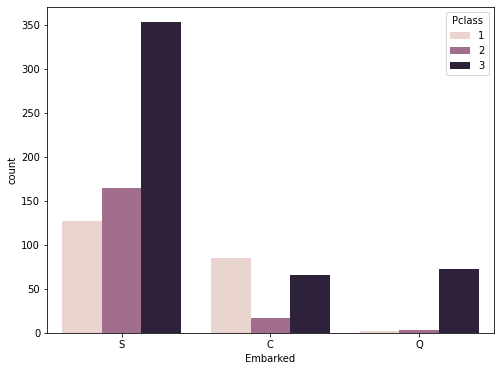

In [26]:
sns.countplot(data = train, x = 'Embarked', hue = 'Pclass')

S에서의 탑승객이 가장 많고 그중 3-pclass, 2, 1순으로 탑승하였다. 그다음은 C로 그중에 1, 3, 2순이였고 Q에서는 대부분이 3-pclass였다. 
두 컬럼간의 공선성은 크게 없는 것으로 판단된다.

##### Pclass column과 Sex column 

<Axes: xlabel='Pclass', ylabel='count'>

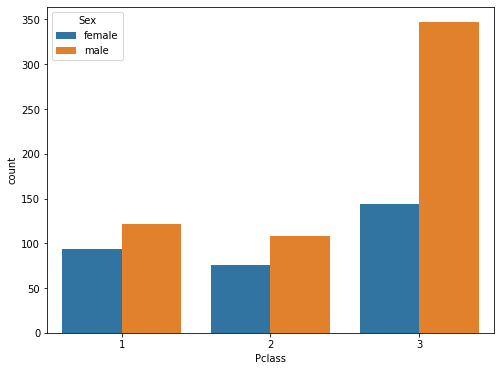

In [27]:
sns.countplot(data = train, x = 'Pclass', hue = 'Sex')

모든 클래스에서 남자가 여자보다 수가 많았고, 특히 3의 경우에는 2배를 넘어섰다. 하지만 여기서도 딱히 공선성이 없는 것으로 판단된다.

##### Embarked column과 Sex column 

<Axes: xlabel='Embarked', ylabel='count'>

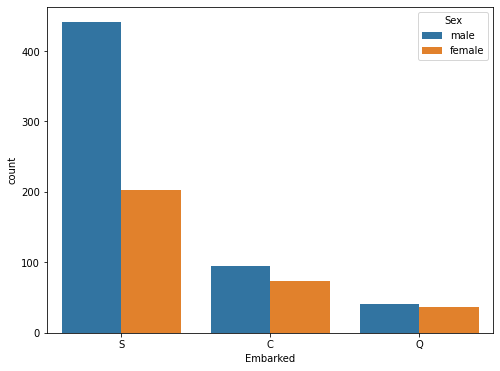

In [28]:
sns.countplot(data = train, x = 'Embarked', hue = 'Sex')

C와 Q에서는 남녀간 비율이 거의 같았고, S에서만 약 두배가량 차이가 났다. 공선성을 확인하기 어렵다.

### 2-2 컬럼 통합
연관이 있는 두 컬럼을 묶어 새로운 특성으로 만들어 준다.

##### SibSp 컬럼과 Parch 컬름 : 두 컬럼은 모두 가족과 관련된 컬럼이므로 Family Size라는 컬럼으로 통합해 주자

In [29]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

### 2-3 컬럼 제외
Ticket과 PassengerId, Cabin 컬럼을 제거해 주고, FamilySize로 통합된 SIbSp와 Parch고 제거해 준다.

In [30]:
train = train.drop(columns=['Ticket','PassengerId','Cabin','SibSp','Parch'])

### 2-4 컬럼 맵핑
카테고리형 컬럼인 Sex와 Embarked 컬럼을 수치형으로 매핑해준다.

Sex 컬럼은 male과 female 이므로 각각을 0과 1로 매핑,
Embarked 컬럼은 C, S, Q 세개의 값을 가지므로 각각 0, 1, 2로 매핑해 준다.

In [31]:
train['Sex'] = train['Sex'].map({'male':0, 'female':1})
train['Embarked'] = train['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [32]:
train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,2.0,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,0.0,2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,2.0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,2.0,2
4,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,2.0,1


이름의 경우 title만 따와서 사용해보자. 

In [33]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [34]:
train['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [35]:
train = train.drop(columns='Name')

In [36]:
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

이름의 타이틀을 추출해본 결과, Mr Miss Mrs Master 까지는 유의미하지만 나머지는 수가 너무 적기에 others로 통합하였다.

In [37]:
train['Title'] = train['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'],'Others')
train['Title'] = train['Title'].replace('Ms','Miss')
train['Title'] = train['Title'].replace('Mme','Mrs')
train['Title'] = train['Title'].replace('Mlle','Miss')

Text(0, 0.5, 'count')

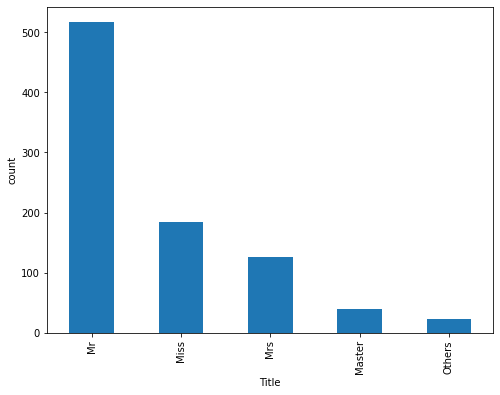

In [38]:
train['Title'].value_counts().plot(kind='bar')
plt.xlabel('Title')
plt.ylabel('count')

Title 별로 생존확률을 확인해 보자.

Text(0, 0.5, 'Survival Probability')

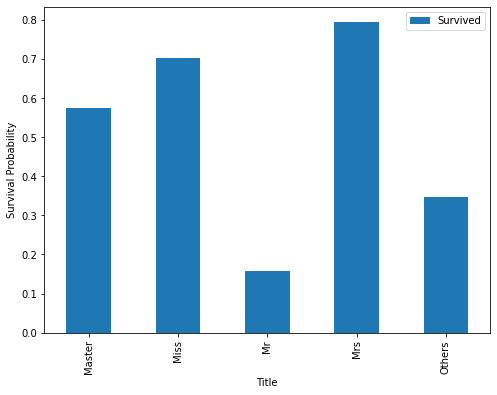

In [39]:
train[['Title','Survived']].groupby('Title').mean().plot(kind='bar')
plt.xlabel('Title')
plt.ylabel('Survival Probability')

타이틀 별로 유의미한 의미를 띄는 듯 하지만 정확한 의미는 알지 못하겠다.
마찬가지로 매핑을 통해 수치형으로 변환해주자

In [40]:
train['Title'] = train['Title'].map({'Master':0,'Miss':1,'Mr':2,'Mrs':3,'Others':4})

### 2-5 결측치 처리

먼저 isnull().sum()을 통해 결측치의 수를 세어주자

In [41]:
train.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
Fare            0
Embarked        2
FamilySize      0
Title           0
dtype: int64

먼저 Embarked 컬럼에서는 2개의 결측치만 확인되었는데, 다른 변수와의 관계를 확인해보자면

In [43]:
train[train['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
61,1,1,1,38.0,80.0,NaN,1,1
829,1,1,1,62.0,80.0,NaN,1,3


Embarked 가 결측치일 때를 보면 Pclass 가 1, Sex가 1, Fare가 80, FamilySize는 1이였다. 이 요소들과 Embarked 사이의 관계를 확인해 봐야 한다.

In [44]:
train[train['Fare']==80]

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
61,1,1,1,38.0,80.0,NaN,1,1
829,1,1,1,62.0,80.0,NaN,1,3


<Axes: xlabel='Embarked', ylabel='Fare'>

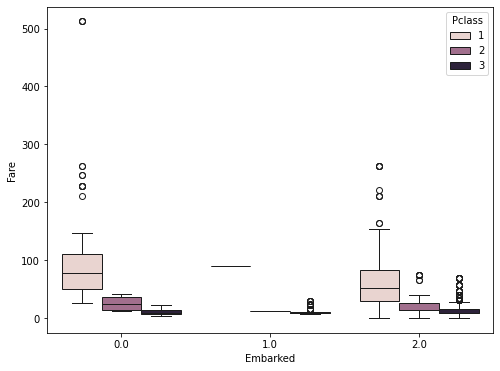

In [49]:
sns.boxplot(x='Embarked',y='Fare',hue='Pclass', data = train)

Embarked. Pclass별로의 Fare를 봤을때, 평균 C에서 Pclass가 1일 때의 평균 요금이 80정도이므로 Embarked를 0으로 설정해주는 것이 나쁘지 않아 보인다.

In [85]:
train['Embarked'] = train['Embarked'].fillna('0')

In [75]:
import missingno as msno

In [76]:
missingdata_df = train.columns[train.isnull().any()].tolist()

In [77]:
def if_null(x):
    if x is True: return 0
    else : return 1

In [78]:
train['hasAge'] = train['Age'].isnull().apply(if_null)

In [79]:
train['hasAge']

0      1
1      1
2      1
3      1
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: hasAge, Length: 891, dtype: int64

새로운 데이터 프레임을 생성하여 결측치들이 다른 컬럼들과의 관계를 확인해보려고 한다.

In [87]:
train[train['Embarked']=='C'] = 0

In [88]:
train['Embarked'].value_counts()

Embarked
2.0    644
0.0    170
1.0     77
Name: count, dtype: int64

In [89]:
df_train = train.loc[:,['Survived', 'Pclass', 'Title', 'Sex', 'FamilySize', 'Embarked', 'Fare', 'hasAge']]

In [90]:
df_train['Embarked'].value_counts()

Embarked
2.0    644
0.0    170
1.0     77
Name: count, dtype: int64

In [91]:
df_train.corr()

,Survived,Pclass,Title,Sex,FamilySize,Embarked,Fare,hasAge
Survived,1.000000,-0.327613,-0.067079,0.542178,0.020319,-0.165479,0.256134,0.094021
Pclass,-0.327613,1.000000,-0.164091,-0.122045,0.070849,0.174505,-0.539292,-0.157163
Title,-0.067079,-0.164091,1.000000,-0.056566,-0.194469,0.015358,-0.010038,0.033659
Sex,0.542178,-0.122045,-0.056566,1.000000,0.204697,-0.106604,0.180830,0.056843
FamilySize,0.020319,0.070849,-0.194469,0.204697,1.000000,0.072032,0.219924,0.054690
Embarked,-0.165479,0.174505,0.015358,-0.106604,0.072032,1.000000,-0.222456,0.159533
Fare,0.256134,-0.539292,-0.010038,0.180830,0.219924,-0.222456,1.000000,0.102162
hasAge,0.094021,-0.157163,0.033659,0.056843,0.054690,0.159533,0.102162,1.000000


hasAge 컬럼은 다른 컬럼들과의 관계가 크게 없는 것으로 나타났다.

In [92]:
train.corr()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title,hasAge
Survived,1.000000,-0.327613,0.542178,-0.077195,0.256134,-0.165479,0.020319,-0.067079,0.094021
Pclass,-0.327613,1.000000,-0.122045,-0.345055,-0.539292,0.174505,0.070849,-0.164091,-0.157163
Sex,0.542178,-0.122045,1.000000,-0.094076,0.180830,-0.106604,0.204697,-0.056566,0.056843
Age,-0.077195,-0.345055,-0.094076,1.000000,0.096268,-0.020573,-0.290774,0.514922,0.107694
Fare,0.256134,-0.539292,0.180830,0.096268,1.000000,-0.222456,0.219924,-0.010038,0.102162
Embarked,-0.165479,0.174505,-0.106604,-0.020573,-0.222456,1.000000,0.072032,0.015358,0.159533
FamilySize,0.020319,0.070849,0.204697,-0.290774,0.219924,0.072032,1.000000,-0.194469,0.054690
Title,-0.067079,-0.164091,-0.056566,0.514922,-0.010038,0.015358,-0.194469,1.000000,0.033659
hasAge,0.094021,-0.157163,0.056843,0.107694,0.102162,0.159533,0.054690,0.033659,1.000000


hasAge 자체는 다른 컬럼과 관계가 없으나 Age는 Pclass 컬럼과 FamilySize 컬럼과 관계가 있는것으로 나타났다.

In [94]:
 train['Age'].isnull().value_counts()

Age
False    714
True     177
Name: count, dtype: int64

약 20퍼센트 정도의 결측치가 존재하기 때문에 hot deck, regression, model based method등의 방식을 통해 이 값들을 채워줄 필요가 있다.

hot deck : 가장 많은 값으로 대체
mean imputation : 평균값으로 대체
regression imputation : 회귀추정을 통해서 대체

In [96]:
NaN_indexes = train[train['Age'].isnull()].index

In [98]:
for i in NaN_indexes:
    pred_age = train[((train['Pclass']==train.iloc[i]['Pclass']) & (train['FamilySize']==train.iloc[i]['FamilySize']))]['Age'].median()
    if not np.isnan(pred_age):
        train['Age'].iloc[i] = pred_age
    else :
        train['Age'].iloc[i] = train['Age'].median()

C:\Users\wxlov\AppData\Local\Temp\ipykernel_14484\3328387933.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train['Age'].iloc[i] = pred_age
C:\Users\wxlov\AppData\Local\Temp\ipykernel_14484\3328387933.py:4: SettingWithCopyWarning: 
A va

C:\Users\wxlov\AppData\Local\Temp\ipykernel_14484\3328387933.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train['Age'].iloc[i] = pred_age
C:\Users\wxlov\AppData\Local\Temp\ipykernel_14484\3328387933.py:4: SettingWithCopyWarning: 
A va

In [101]:
train['Age'].isnull().value_counts()

Age
False    891
Name: count, dtype: int64

결측치를 모두 채워줬다. 이로서 데이터의 전처리가 일차적으로 완료되었다.